In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


from sklearn import pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV


from feature_engine import imputation
from feature_engine import encoding

In [39]:
def report_model(X, y, model, metric, is_prob=True):
    if is_prob:
        y_pred = model.predict_proba(X)[:,1]
    
    else:
        y_pred = model.predict(X)
    res = metric(y, y_pred)
    return res

##**Importing Dataset**##

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle/Churn/churn.csv', index_col='customerID')
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.shape

(7043, 20)

In [8]:
#changing dependent variable format
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


##**Train and Test Split**##

In [9]:
features = df.columns.tolist()[:-1]
target = 'Churn'

X_train, X_test , y_train, y_test = train_test_split(df[features],
                                                     df[target],
                                                     random_state=42,
                                                     test_size=0.25)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 3892, 1: 1390})
Testing target statistics: Counter({0: 1282, 1: 479})


In [10]:
print('X_train: ' ,X_train.shape)
print('X_test: ' ,X_test.shape)
print('y_train: ' ,y_train.shape)
print('y_test: ' ,y_test.shape)

X_train:  (5282, 19)
X_test:  (1761, 19)
y_train:  (5282,)
y_test:  (1761,)


##**Exploring Training Set**##

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 7242-QZLXF to 4795-UXVCJ
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null 

In [12]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan, regex=True).astype(float)
missing_total = X_train['TotalCharges'].isnull().sum()
print('Missing Values from Total Charges: ',missing_total)

Missing Values from Total Charges:  8


##**Univariate Analisys**##

In [13]:
#customers retained and lost

retained = y_train[y_train == 1].shape[0]
lost = y_train[y_train == 0].shape[0]

retained_pct = (retained / (retained + lost))
lost_pct = (1 - retained_pct)

print(f'Percentage of clients lost: {round(lost_pct*100, 2)} %')
print(f'Percentage of cliets retained: {round(retained_pct*100, 2)} % ')

Percentage of clients lost: 73.68 %
Percentage of cliets retained: 26.32 % 


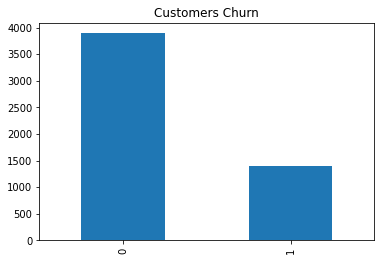

In [14]:
y_train.value_counts().plot(kind='bar')
plt.title('Customers Churn')
plt.show()

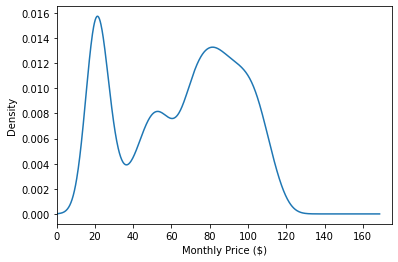

Monthly Charges Mean:  64.7626088602802


In [15]:
#Monthly Charges
X_train['MonthlyCharges'].plot(kind='kde', subplots=False, layout=(1, 8))
plt.xlim([0,175])
plt.xlabel('Monthly Price ($)')
plt.show()
print('Monthly Charges Mean: ',X_train['MonthlyCharges'].mean())

In [16]:
#Payment Methods
X_train['PaymentMethod'].value_counts()

Electronic check             1774
Mailed check                 1208
Bank transfer (automatic)    1164
Credit card (automatic)      1136
Name: PaymentMethod, dtype: int64

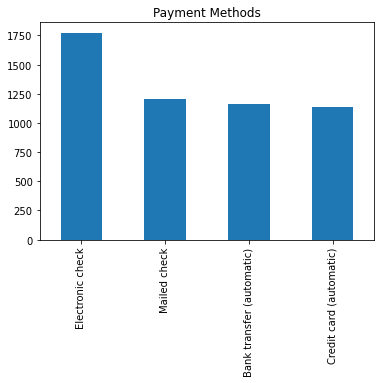

In [17]:
X_train['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('Payment Methods')
plt.show()

In [18]:
#Contract Type
X_train['Contract'].value_counts()

Month-to-month    2893
Two year          1263
One year          1126
Name: Contract, dtype: int64

##**Multivariate Analysis**##

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


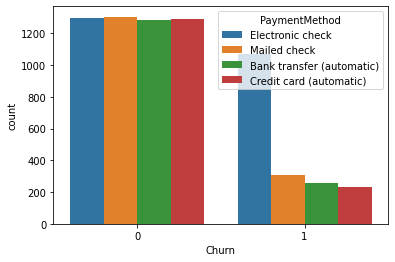

In [19]:
#Churn per payment method
sns.countplot('Churn', hue='PaymentMethod',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


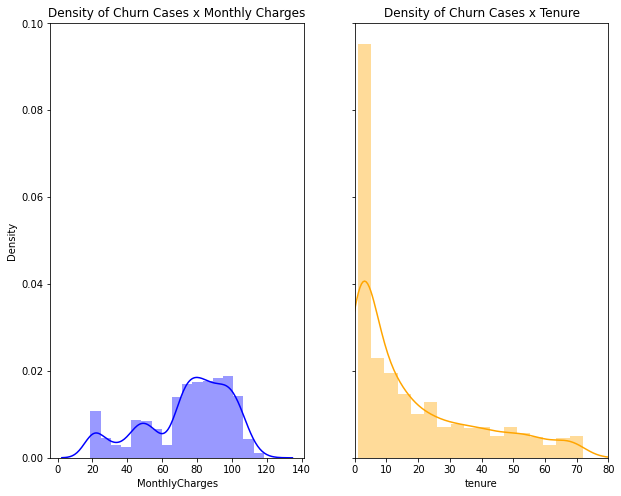

In [22]:
#Churn density x monthly price and  number of months

fig, axes = plt.subplots(1,2, sharey = True, figsize = (10,8))

axes[0].set_title('Density of Churn Cases x Monthly Charges')
sns.distplot(df[df['Churn'] == 1]['MonthlyCharges'], hist=True, color='blue', ax = axes[0])

axes[1].set_title('Density of Churn Cases x Tenure')
axes[1].set_xlim(0,80)
sns.distplot(df[df['Churn'] == 1]['tenure'], hist=True, color='orange', ax = axes[1])

plt.show()




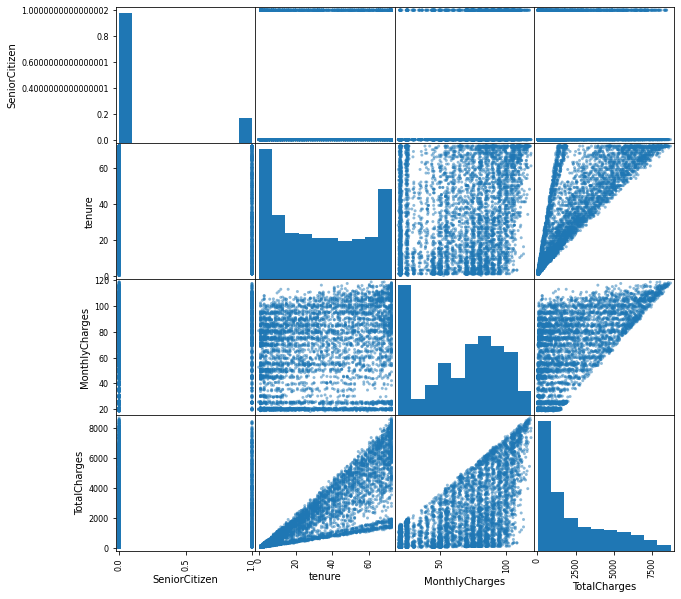

<Figure size 432x288 with 0 Axes>

In [23]:
pd.plotting.scatter_matrix(X_train, figsize=(10,10))
plt.figure()
plt.show()

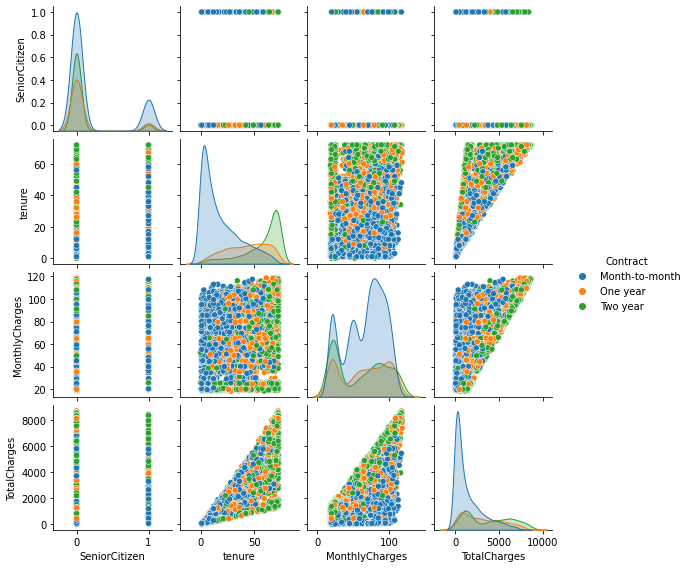

In [24]:
_ = sns.pairplot(X_train, hue="Contract", height=2, diag_kind="kde")
plt.show()

##**Outlier Detection**##

In [25]:
#function for outlier detection - #Criteria: Data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers

outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

for feature in ['tenure','MonthlyCharges','TotalCharges']:

  sample_outliers = detect_outliers_iqr(X_train[feature])
  print(f"Outliers from {feature} : ", sample_outliers)

Outliers from tenure :  []
Outliers from MonthlyCharges :  []
Outliers from TotalCharges :  []


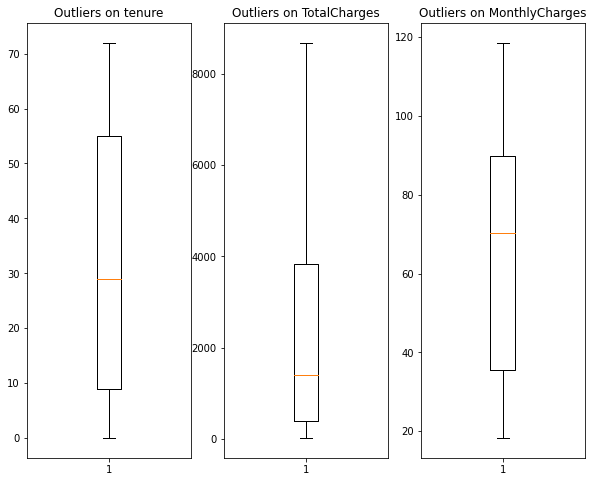

In [26]:
list_out = ['tenure','TotalCharges','MonthlyCharges']

fig, axes = plt.subplots(1,len(list_out), figsize = (10,8))

for i, feature in enumerate(list_out):
 
  axes[i].set_title(f'Outliers on {feature}')
  axes[i].boxplot(X_train[feature].dropna())

plt.show()


##**Feature Engineering Pipeline**##

In [27]:
cat_features = X_train.dtypes[X_train.dtypes=='object'].index.tolist()
num_features = list(set(X_train.columns) - set(cat_features))

In [29]:
#encoding
onehot = encoding.OneHotEncoder(drop_last=True, variables=cat_features)

#imputing median value on NaN ocurrencies
imput = imputation.MeanMedianImputer(imputation_method='median', variables='TotalCharges')

#classifier
rf_clf = ensemble.RandomForestClassifier(n_estimators=200, min_samples_leaf=50, n_jobs=-1, random_state=42)

#defining a pipeline
model_pipe = pipeline.Pipeline(steps=[
                                      ('One Hot', onehot),
                                      ('Imput', imput),
                                      ('Model', rf_clf)])


In [30]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('One Hot',
                 OneHotEncoder(drop_last=True,
                               variables=['gender', 'Partner', 'Dependents',
                                          'PhoneService', 'MultipleLines',
                                          'InternetService', 'OnlineSecurity',
                                          'OnlineBackup', 'DeviceProtection',
                                          'TechSupport', 'StreamingTV',
                                          'StreamingMovies', 'Contract',
                                          'PaperlessBilling',
                                          'PaymentMethod'])),
                ('Imput', MeanMedianImputer(variables='TotalCharges')),
                ('Model',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [31]:
#Features importance
print('Feature importance by model ...')
features_transformed = model_pipe[:-1].transform(df[features]).columns.tolist()
features_importance = pd.DataFrame(model_pipe[-1].feature_importances_, index=features_transformed)
features_importance.sort_values(by=0, ascending=False)

Feature importance by model ...


,0
Contract_Month-to-month,0.168812
tenure,0.165858
TotalCharges,0.106565
OnlineSecurity_No,0.104889
TechSupport_No,0.086860
InternetService_Fiber optic,0.065136
PaymentMethod_Electronic check,0.063520
MonthlyCharges,0.050067
InternetService_DSL,0.033511
OnlineBackup_No,0.029073


In [32]:
#features with less than 0.05 of importance will be cut from the model
new_features = ['Contract','tenure', 'TotalCharges', 'OnlineSecurity', 'TechSupport' ,'InternetService','PaymentMethod','MonthlyCharges']

X_train, X_test , y_train, y_test = train_test_split(df[new_features],
                                                     df[target],
                                                     random_state=42,
                                                     test_size=0.25,
                                                     stratify=df[target])

X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan, regex=True).astype(float)

In [33]:
cat_features = X_train.dtypes[X_train.dtypes=='object'].index.tolist()
num_features = list(set(X_train.columns) - set(cat_features))

In [34]:
#features with less than 0.05 of importance will be cut from the model
new_features = ['Contract','tenure', 'TotalCharges', 'OnlineSecurity', 'TechSupport' ,'InternetService','PaymentMethod','MonthlyCharges']

X_train, X_test , y_train, y_test = train_test_split(df[new_features],
                                                     df[target],
                                                     random_state=42,
                                                     test_size=0.25,
                                                     stratify=df[target])

X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan, regex=True).astype(float)

In [35]:
cat_features = X_train.dtypes[X_train.dtypes=='object'].index.tolist()
num_features = list(set(X_train.columns) - set(cat_features))

In [37]:
#encoding
onehot = encoding.OneHotEncoder(drop_last=True, variables = cat_features)

#imputing median value of NaN
imput = imputation.MeanMedianImputer(imputation_method='median', variables ='TotalCharges' )

#decision tree classifier
dt_clf = tree.DecisionTreeClassifier(max_depth=15,
                            min_samples_leaf=50,
                            random_state=42)

#gridsearch - Decision Tree
params = {'max_depth': [5,15,25,35,45,50],
          'min_samples_leaf': [5,10,20,40,60,80,100]}

grid_search = GridSearchCV(dt_clf,
                          params,
                           n_jobs=1,
                           cv=4,
                           scoring='roc_auc',
                           verbose=0,
                           refit=True)

#redefining the pipeline
model_pipe = pipeline.Pipeline(steps=[
                                      ('OneHot', onehot),
                                      ('Imput', imput),
                                      ('Model', grid_search)])


In [38]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 OneHotEncoder(drop_last=True,
                               variables=['Contract', 'OnlineSecurity',
                                          'TechSupport', 'InternetService',
                                          'PaymentMethod'])),
                ('Imput', MeanMedianImputer(variables='TotalCharges')),
                ('Model',
                 GridSearchCV(cv=4,
                              estimator=DecisionTreeClassifier(max_depth=15,
                                                               min_samples_leaf=50,
                                                               random_state=42),
                              n_jobs=1,
                              param_grid={'max_depth': [5, 15, 25, 35, 45, 50],
                                          'min_samples_leaf': [5, 10, 20, 40,
                                                               60, 80, 100]},
                              scoring='roc_auc'))])

In [43]:
print('Baseline:', round((1 - y_train.mean())*100, 2))

Baseline: 73.46


In [40]:
auc_train = report_model(X_train, y_train, model_pipe, metrics.roc_auc_score)
auc_test = report_model(X_test, y_test, model_pipe, metrics.roc_auc_score)

print("auc_train:", auc_train)
print("auc_test:", auc_test)

auc_train: 0.8507527905642897
auc_test: 0.8357730788452056


In [42]:
y_train_pred = model_pipe.predict(X_train)
y_train_prob = model_pipe.predict_proba(X_train)

acc_train = metrics.accuracy_score(y_train, y_train_pred)
roc_train = metrics.roc_auc_score(y_train, y_train_prob[:, 1])
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3880
           1       0.68      0.48      0.57      1402

    accuracy                           0.80      5282
   macro avg       0.76      0.70      0.72      5282
weighted avg       0.79      0.80      0.79      5282



In [45]:
y_test_pred = model_pipe.predict(X_test)
y_test_prob = model_pipe.predict_proba(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.80      0.79      1761

